# Binary


Number of mislabeled points out of a total 40 points: 7


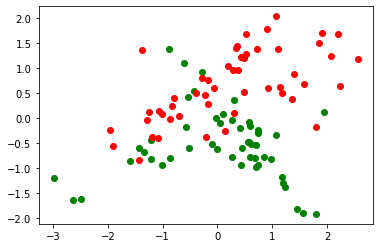

In [0]:
# Let's make some fictitious data! See: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
%matplotlib inline

X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_classes=2,
    n_redundant=0,
    n_informative=2,
    class_sep=0.50,
    random_state=101
)

plt.plot(X[y==0][:, 0], X[y==0][:, 1], 'go')
plt.plot(X[y==1][:, 0], X[y==1][:, 1], 'ro')


# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(f'Number of mislabeled points out of a total {X_test.shape[0]} points: {(y_pred != y_test).sum()}')

In [0]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print(confusion_matrix(y_test, y_pred, labels=[1, 0]))
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1, 0]).ravel()
print(tp, fn, fp, tn)

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0], labels=[1, 0]))

[[17  3]
 [ 4 16]]
17 3 4 16
0.825
0.8292682926829269
0.8095238095238095
0.85
[[1 1]
 [2 0]]




# Multiclass


In [0]:
import urllib.request
import pandas as pd
import numpy as np


iris_data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
urllib.request.urlretrieve(iris_data_url, 'iris.data')

dataset = pd.read_csv('iris.data', header=None)
dataset.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
print(dataset.head())

# Split the data to X (values) and y (labels)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values   

d = dict()
for i, label in enumerate(np.unique(y)):
  d[label] = i
  y[y == label] = i

y = y.astype(int)

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)

# SVM

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
# Training
svclassifier.fit(X_train, y_train)
# Prediction
y_pred = svclassifier.predict(X_test)


   sepal_length  sepal_width  petal_length  petal_width        label
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
int64


In [0]:
# Evaluation!
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=range(3))
print(cm)

for c in range(3):
  tp = cm[c,c]
  fp = cm[:,c].sum() - tp
  fn = cm[c,:].sum() - tp
  tn = cm.sum() - fp - fn - tp

  acc = tp/(tp+fp+fn)
  rec =  tp/(tp+fn)
  prec = tp/(tp+fp)
  f1 = 2*tp/(2*tp+fn+fp)
  print(f'Class: {c}, {tp}, {acc:2.2f}')

[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]
Class: 0, 21, 1.00
Class: 1, 9, 0.90
Class: 2, 14, 0.93
